First, import needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [2]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [3]:
data = pd.read_csv(f'{path}/data/btw_treatment.csv', encoding = 'UTF-8-SIG', sep=',')
#data = data.set_index(['AGS', 'year'])
data.head(10)

,AGS,year,post_2013,post_2017,GEN,Land,Wahlberechtigte,Wähler,Union,SPD,...,Grüne,Andere,Erststimme,Zweitstimme,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
0,1001000,2002,0,0,Flensburg,1,65740,74.618193,33.469238,53.632731,...,5.775268,0.395483,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
1,1001000,2002,0,0,Flensburg,1,65740,74.618193,29.277939,47.694378,...,11.326293,1.948873,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1001000,2005,0,0,Flensburg,1,66970,73.170076,34.598588,49.510224,...,5.569160,5.507938,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
3,1001000,2005,0,0,Flensburg,1,66970,73.170076,28.386596,42.855394,...,10.260806,2.112159,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1001000,2009,0,0,Flensburg,1,69075,67.438292,29.751197,35.532276,...,11.849816,11.152137,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
5,1001000,2009,0,0,Flensburg,1,69075,67.438292,24.124681,27.346886,...,15.720327,5.010412,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1001000,2013,1,0,Flensburg,1,70321,66.590350,33.414483,40.393363,...,9.680313,13.530655,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
7,1001000,2013,1,0,Flensburg,1,70321,66.590350,30.187712,35.193371,...,11.760309,9.184872,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1001000,2017,1,1,Flensburg,1,70105,70.885101,30.466455,30.536886,...,11.989375,19.147181,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
9,1001000,2017,1,1,Flensburg,1,70105,70.885101,26.928804,24.433533,...,14.923331,11.186461,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0


View summary statistics

In [15]:
columns = ['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'treated_0', 'treated_10', 'treated_20', 'treated_30', 'treated_50', 'treated_100']
data.describe().to_csv(f'{path}/tables/descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',')

Split data in Erst- and Zweitstimme

In [5]:
erst = data[data['Erststimme'] == 1]
zweit = data[data['Zweitstimme'] == 1]
erst.head(10)

,AGS,year,post_2013,post_2017,GEN,Land,Wahlberechtigte,Wähler,Union,SPD,...,Grüne,Andere,Erststimme,Zweitstimme,treated_0,treated_10,treated_20,treated_30,treated_50,treated_100
0,1001000,2002,0,0,Flensburg,1,65740,74.618193,33.469238,53.632731,...,5.775268,0.395483,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
2,1001000,2005,0,0,Flensburg,1,66970,73.170076,34.598588,49.510224,...,5.569160,5.507938,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4,1001000,2009,0,0,Flensburg,1,69075,67.438292,29.751197,35.532276,...,11.849816,11.152137,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
6,1001000,2013,1,0,Flensburg,1,70321,66.590350,33.414483,40.393363,...,9.680313,13.530655,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
8,1001000,2017,1,1,Flensburg,1,70105,70.885101,30.466455,30.536886,...,11.989375,19.147181,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
10,1002000,2002,0,0,Kiel,1,176468,78.064012,29.252022,54.049130,...,6.718303,0.786161,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12,1002000,2005,0,0,Kiel,1,177028,77.035836,32.000733,50.952887,...,6.271677,6.265811,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
14,1002000,2009,0,0,Kiel,1,182726,71.705176,28.057455,37.973196,...,13.154079,10.116467,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
16,1002000,2013,1,0,Kiel,1,187464,70.442325,31.357626,43.219441,...,10.195829,12.026141,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
18,1002000,2017,1,1,Kiel,1,186988,74.058763,29.189564,31.092352,...,14.507405,16.888237,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


Calculate average vote shares in all years by treated 50

In [6]:
erst_avg = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'treated_50', 'year']].groupby(['treated_50', 'year'], as_index = False).mean()
zweit_avg = zweit[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', 'treated_50', 'year']].groupby(['treated_50', 'year'], as_index = False).mean()
erst_avg.head(10)

,treated_50,year,Union,SPD,FDP,Linke,Grüne,Andere
0,0.0,2002,47.742491,36.091956,5.711972,3.046273,4.480520,1.056259
1,0.0,2005,46.266221,32.825395,4.949183,6.527592,4.316309,9.504476
2,0.0,2009,42.629327,22.832821,10.171993,11.041332,7.433151,14.675857
3,0.0,2013,50.276080,23.496503,2.217354,8.874252,5.178660,17.041538
4,0.0,2017,41.157830,20.417142,6.324016,7.788178,5.740720,24.867947
5,1.0,2002,46.114424,39.046811,5.883526,2.231172,4.290848,0.730024
6,1.0,2005,45.821631,35.526884,4.796767,5.138152,3.978535,7.882350
7,1.0,2009,43.216866,26.098546,9.887654,8.885344,7.178444,11.572663
8,1.0,2013,49.601758,27.464857,2.315940,6.848436,5.188305,13.673747
9,1.0,2017,42.083234,23.431033,6.458023,6.441768,5.769054,20.932873


Split data into treated and untreated

In [7]:
erst_avg_treated = erst_avg[erst_avg['treated_50'] == 1]
erst_avg_untreated = erst_avg[erst_avg['treated_50'] == 0]
zweit_avg_treated = zweit_avg[zweit_avg['treated_50'] == 1]
zweit_avg_untreated = zweit_avg[zweit_avg['treated_50'] == 0]
erst_avg_treated.head(10)

,treated_50,year,Union,SPD,FDP,Linke,Grüne,Andere
5,1.0,2002,46.114424,39.046811,5.883526,2.231172,4.290848,0.730024
6,1.0,2005,45.821631,35.526884,4.796767,5.138152,3.978535,7.882350
7,1.0,2009,43.216866,26.098546,9.887654,8.885344,7.178444,11.572663
8,1.0,2013,49.601758,27.464857,2.315940,6.848436,5.188305,13.673747
9,1.0,2017,42.083234,23.431033,6.458023,6.441768,5.769054,20.932873


Plot the average vote shares over years for treated and untreated municipalities

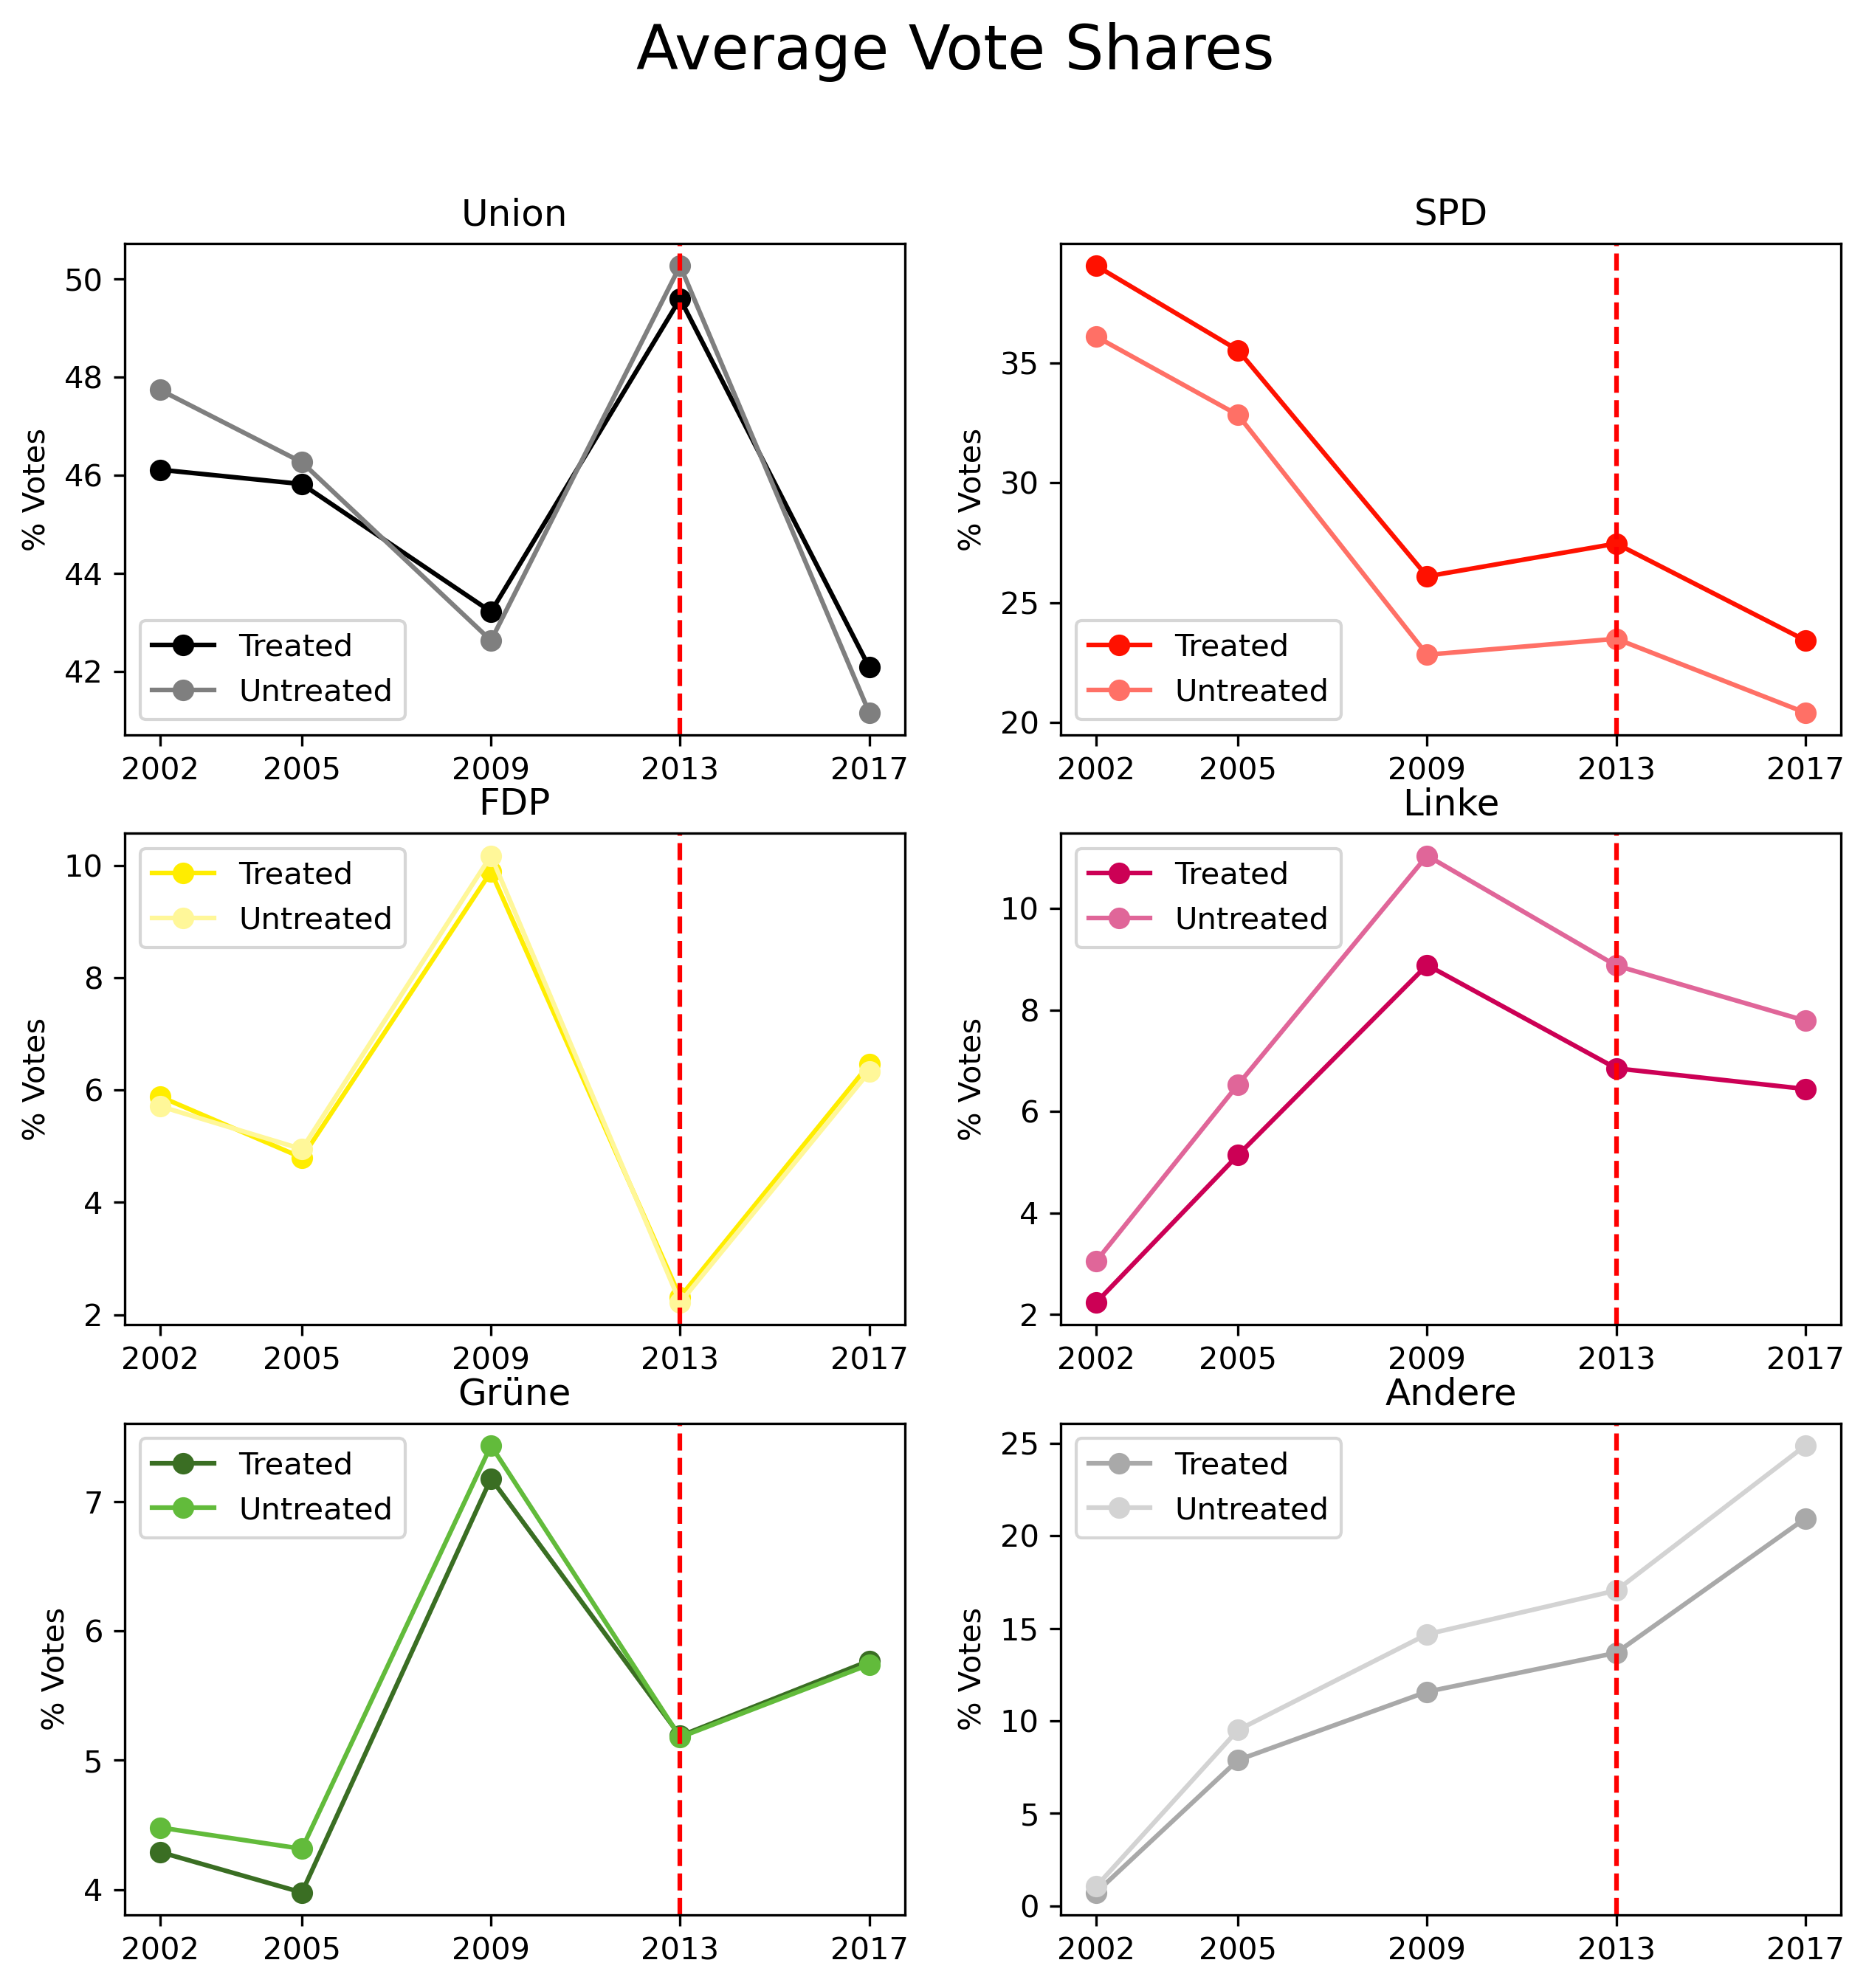

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
#set x labels
plt.setp(axes, xticks=[2002,2005,2009,2013,2017])
# title for entire figure
fig.suptitle('Average Vote Shares', fontsize=20)

# edit subplots
axes[0, 0].set_title('Union', fontsize=12)
axes[0, 0].set_ylabel('% Votes', fontsize=10)
axes[0, 0].plot(erst_avg_treated['year'], erst_avg_treated['Union'], color='#000000', marker = 'o', label='Treated')
axes[0, 0].plot(erst_avg_untreated['year'], erst_avg_untreated['Union'], color='#7f7f7f', marker = 'o', label='Untreated')
axes[0, 0].legend(loc='lower left')
axes[0, 0].axvline(x=2013, color='red', linestyle='--')

axes[0, 1].set_title('SPD', fontsize=12)
axes[0, 1].set_ylabel('% Votes', fontsize=10)
axes[0, 1].plot(erst_avg_treated['year'], erst_avg_treated['SPD'], color='#ff1100', marker = 'o', label='Treated')
axes[0, 1].plot(erst_avg_untreated['year'], erst_avg_untreated['SPD'], color='#ff7066', marker = 'o', label='Untreated')
axes[0, 1].legend(loc='lower left')
axes[0, 1].axvline(x=2013, color='red', linestyle='--')

axes[1, 0].set_title('FDP', fontsize=12)
axes[1, 0].set_ylabel('% Votes', fontsize=10)
axes[1, 0].plot(erst_avg_treated['year'], erst_avg_treated['FDP'], color='#ffed00', marker = 'o', label='Treated')
axes[1, 0].plot(erst_avg_untreated['year'], erst_avg_untreated['FDP'], color='#fff799', marker = 'o', label='Untreated')
axes[1, 0].legend(loc='upper left')
axes[1, 0].axvline(x=2013, color='red', linestyle='--')

axes[1, 1].set_title('Linke', fontsize=12)
axes[1, 1].set_ylabel('% Votes', fontsize=10)
axes[1, 1].plot(erst_avg_treated['year'], erst_avg_treated['Linke'], color='#cc0055', marker = 'o', label='Treated')
axes[1, 1].plot(erst_avg_untreated['year'], erst_avg_untreated['Linke'], color='#e06699', marker = 'o', label='Untreated')
axes[1, 1].legend(loc='upper left')
axes[1, 1].axvline(x=2013, color='red', linestyle='--')

axes[2, 0].set_title('Grüne', fontsize=12)
axes[2, 0].set_ylabel('% Votes', fontsize=10)
axes[2, 0].plot(erst_avg_treated['year'], erst_avg_treated['Grüne'], color='#3a6e23', marker = 'o', label='Treated')
axes[2, 0].plot(erst_avg_untreated['year'], erst_avg_untreated['Grüne'], color='#62bb3b', marker = 'o', label='Untreated')
axes[2, 0].legend(loc='upper left')
axes[2, 0].axvline(x=2013, color='red', linestyle='--')

axes[2, 1].set_title('Andere', fontsize=12)
axes[2, 1].set_ylabel('% Votes', fontsize=10)
axes[2, 1].plot(erst_avg_treated['year'], erst_avg_treated['Andere'], color='darkgrey', marker = 'o', label='Treated')
axes[2, 1].plot(erst_avg_untreated['year'], erst_avg_untreated['Andere'], color='lightgrey', marker = 'o', label='Untreated')
axes[2, 1].legend(loc='upper left')
axes[2, 1].axvline(x=2013, color='red', linestyle='--')

# Save figure
fig.savefig(f'{path}/figures/vote_shares.png')